<a href="https://colab.research.google.com/github/taradesvira/Putu-Tara-Desvira-Data-Analytics-Portfolio/blob/main/Mutual_Funds_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A. Customer Segmentation Backgroud

**Company X** is an Indonesian investment startup that owns an application for buying and selling mutual funds. The mutual funds consist of: stock mutual funds, bond mutual funds, money market mutual funds, and mixed-investment mutual funds.

**Customer segmentation** is a vital process for any business, especially for a mutual funds company looking to develop a targeted marketing strategy. By using K-means clustering and silhouette analysis on pre-explored data, the company can identify distinct groups of customers based on their investment preferences, behavior, and demographics. With this information, the company can tailor its marketing approach to each customer segment, highlighting the benefits of different products and services and communicating in a way that resonates with each group. This targeted approach can improve customer satisfaction, increase loyalty and retention, and ultimately drive revenue growth. By leveraging data-driven insights, the mutual funds company can create a more effective and efficient marketing strategy that is well-aligned with the needs and preferences of its customers.


#B. Customer Segmentation

**The steps for conducting the segmentation analysis, are as follows:**
- Import the data (pre-explored).
-Determine the optimal number of clusters using the elbow method -and silhouette analysis.
-Interpret the resulting clusters to understand their patterns and characteristics.
-Use the insights gained from the analysis to inform business decisions and strategies.

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for statistical modelling /clustering

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for performing silhoutte analysis
from sklearn.datasets import make_blobs  

##Data Preparation

>In conducting the segmentation analysis, I have focused on two key variables, namely user age and total invested amount, as they are suitable for segmenting a given population. These variables are expected to be valuable in achieving our primary objective of developing a thematic marketing campaign for the upcoming month. By leveraging user age and total invested amount, we can tailor our marketing message to the appropriate audience and ensure that it resonates with their specific needs and preferences. This approach will enable us to develop a targeted marketing strategy that effectively communicates the benefits of our products and services.



In [ ]:
# Importing the data

url = 'https://docs.google.com/spreadsheets/d/1GamiXd75PvUD-ZebiNH9--L_fYb88iUAQ6CT33RyFIw/edit#gid=231673548'
url_trf = url.replace('/edit#gid=', '/export?format=csv&gid=')
merged_cluster = pd.read_csv(url_trf)

merged_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18193 entries, 0 to 18192
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   18193 non-null  int64  
 1   registration_import_datetime              18193 non-null  object 
 2   user_gender                               18193 non-null  object 
 3   user_age                                  18193 non-null  int64  
 4   user_occupation                           18193 non-null  object 
 5   user_income_range                         18193 non-null  object 
 6   referral_code_used                        18193 non-null  object 
 7   user_income_source                        18193 non-null  object 
 8   end_of_month_invested_amount              18193 non-null  int64  
 9   total_buy_amount                          18193 non-null  int64  
 10  total_sell_amount                 

In [ ]:
# Merge the columns that I want to use for clustering
df_clust = merged_cluster[['user_id', 'user_age', 'total_invested_amount']]
df_clust

,user_id,user_age,total_invested_amount
0,3783302,57,1000000
1,3783302,57,2000000
2,3783302,57,2000000
3,3783302,57,2000000
4,3783302,57,2000000
...,...,...,...
18188,3765807,49,29500000
18189,3765807,49,29500000
18190,3765807,49,30500000
18191,3765807,49,30730000


In [ ]:
# Assign user_id as index
df_clustering = df_clust.set_index(['user_id'])
df_clustering

,user_age,total_invested_amount
user_id,,
3783302,57,1000000
3783302,57,2000000
3783302,57,2000000
3783302,57,2000000
3783302,57,2000000
...,...,...
3765807,49,29500000
3765807,49,29500000
3765807,49,30500000


<Axes: xlabel='total_invested_amount'>

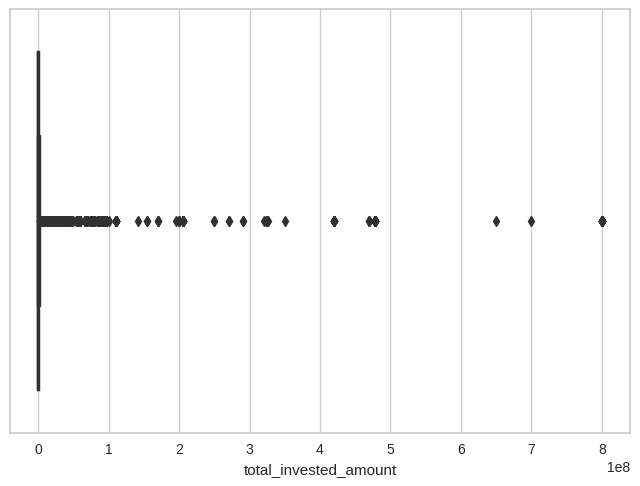

In [ ]:
sns.boxplot(data = df_clustering , x ='total_invested_amount')

In [ ]:
dfc_clean = df_clustering.copy()

# Calculating Quartile 1 dan 3
Q1 = dfc_clean ['total_invested_amount'].quantile(0.25)
Q3 = dfc_clean ['total_invested_amount'].quantile(0.75)

# Calculating Interquartile Range
IQR = Q3 - Q1
LB = Q1 - 0.5 * IQR
UB = Q3 + 0.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',LB)
print('\nMax:\n',UB)

Q1:
 100451.0

Q3:
 1350000.0

IQR:
 1249549.0

Min:
 -524323.5

Max:
 1974774.5


In [ ]:
# Eleminating the outliers and assigning it to a new variable "df_out_clean"
dfc_out_cleaned= dfc_clean[~((dfc_clean['total_invested_amount'] < LB) | (dfc_clean['total_invested_amount'] > UB))]

<Axes: xlabel='total_invested_amount'>

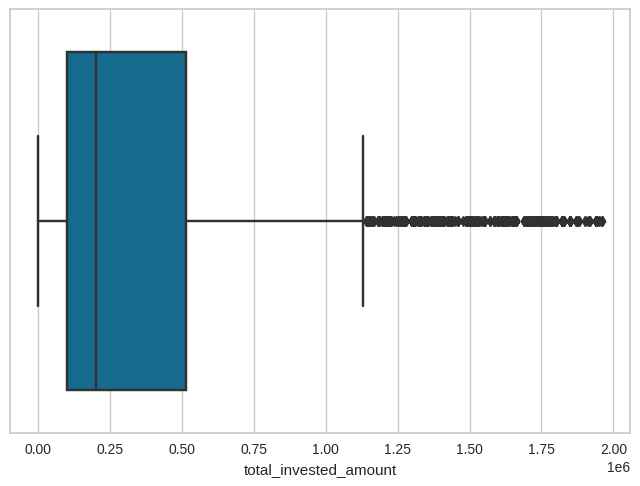

In [ ]:
# Cheking the data distribution of the df_out_cleaned data for 'total_invested_amount'
sns.boxplot(data = dfc_out_cleaned , x ='total_invested_amount')

##Check Data Distribution

###No Scale

<Axes: xlabel='user_age', ylabel='total_invested_amount'>

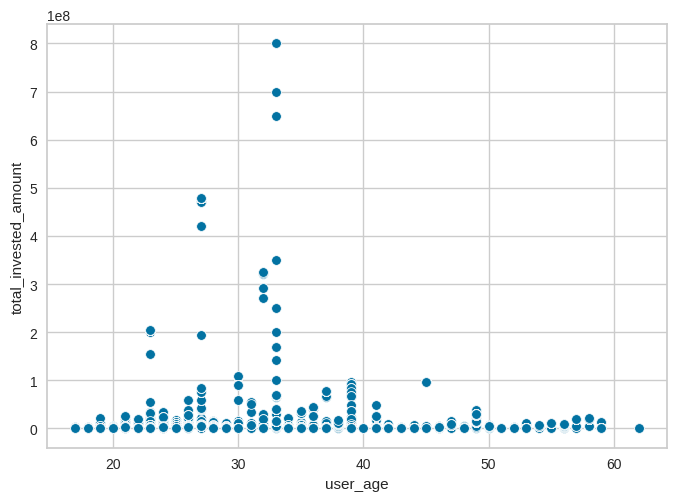

In [ ]:
 sns.scatterplot(data = df_clustering, x='user_age', y='total_invested_amount')

###Standard Scaler

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_clustering.copy()
column = ['user_age', 'total_invested_amount']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<Axes: xlabel='user_age', ylabel='total_invested_amount'>

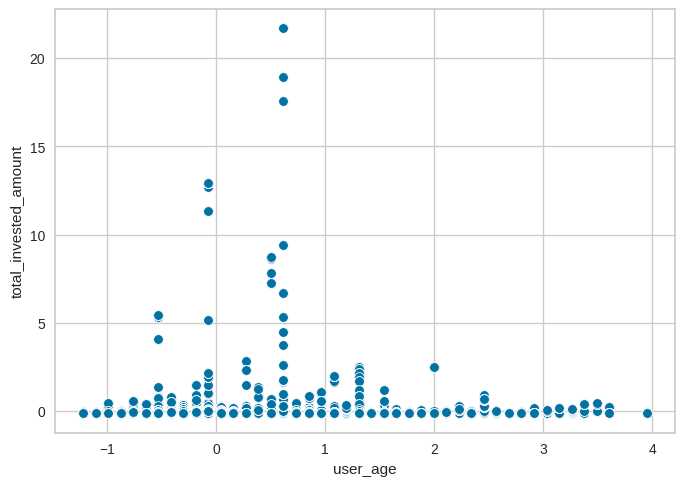

In [ ]:
sns.scatterplot (data = ss_scale_df, x='user_age', y='total_invested_amount')

In [ ]:
ss_scale_df[['user_age', 'total_invested_amount']].head()

,user_age,total_invested_amount
user_id,,
3783302,3.375397,-0.102793
3783302,3.375397,-0.075529
3783302,3.375397,-0.075529
3783302,3.375397,-0.075529
3783302,3.375397,-0.075529


###Robust Scaler

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_clustering.copy()
column = df_clustering.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['user_age', 'total_invested_amount']] = rs_scaler.fit_transform(rs_scale_df[['user_age', 'total_invested_amount']])

<Axes: xlabel='user_age', ylabel='total_invested_amount'>

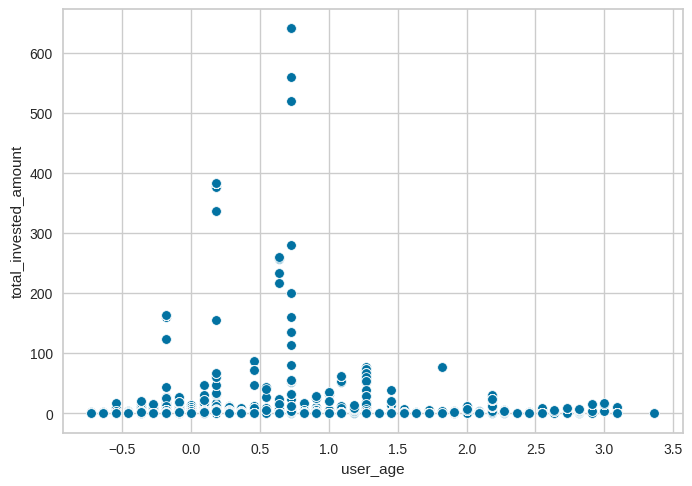

In [ ]:
sns.scatterplot (data = rs_scale_df, x='user_age', y='total_invested_amount')

###MinMax Scaler

In [ ]:
# Define Minmax Scale dataset
mm_scale_df = df_clustering.copy()
column = df_clustering.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['user_age', 'total_invested_amount']] = mm_scaler.fit_transform(mm_scale_df[['user_age', 'total_invested_amount']])

<Axes: xlabel='user_age', ylabel='total_invested_amount'>

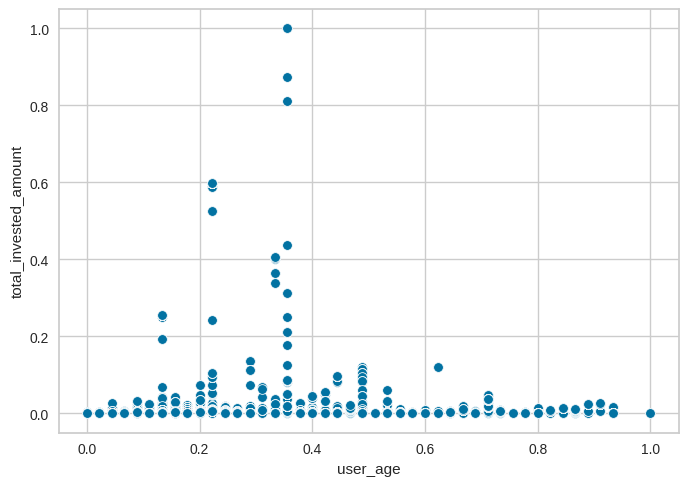

In [ ]:
sns.scatterplot (data = mm_scale_df, x='user_age', y='total_invested_amount')

##Cluster

###Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

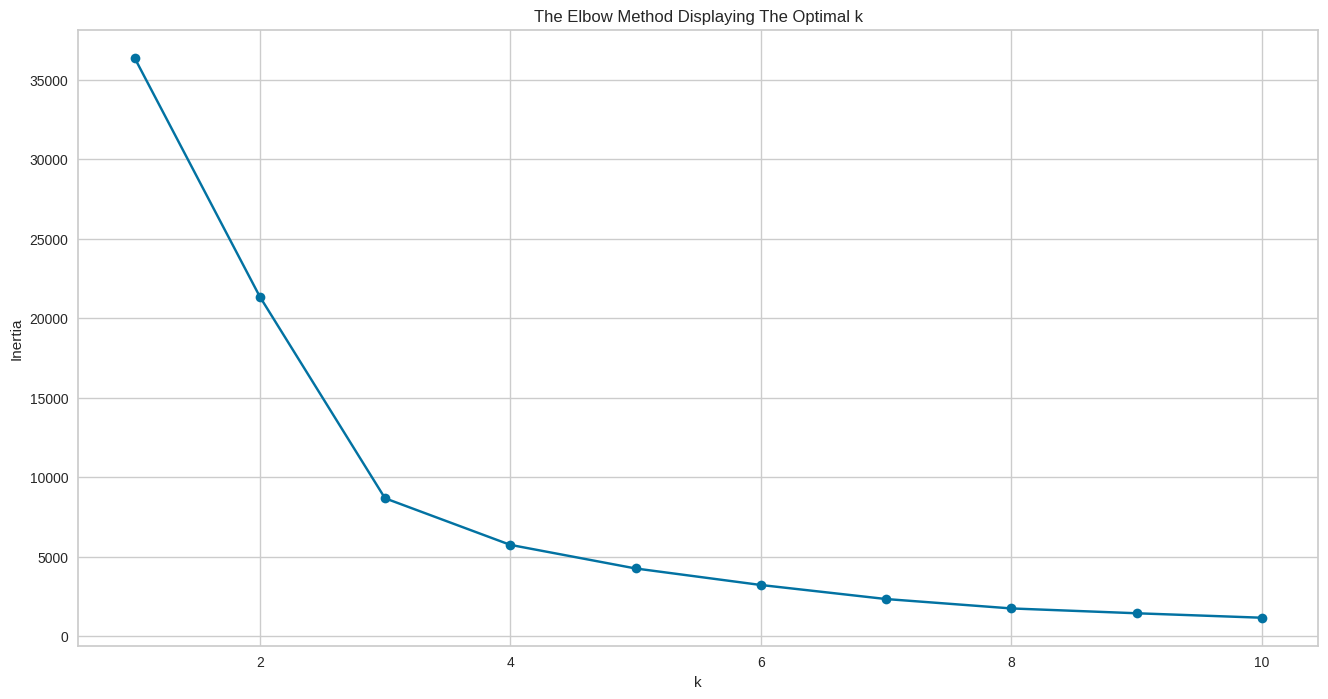

[36386.000000000575, 21362.40273637222, 8674.370826731552, 5743.480344756961, 4259.143219983408, 3219.206570623375, 2335.6134309795534, 1744.8381767548253, 1440.5109901431144, 1160.1839067985784]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)  
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method Displaying The Optimal k')
plt.show()
print(distortions)

###Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot = the silhouette plot
        # The silhouette coefficient can range from -1, 1. In this project all
        # lay within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.9246409150288772


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6449482097108717


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.569463094734697


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5619428392877118


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.5336379053778789


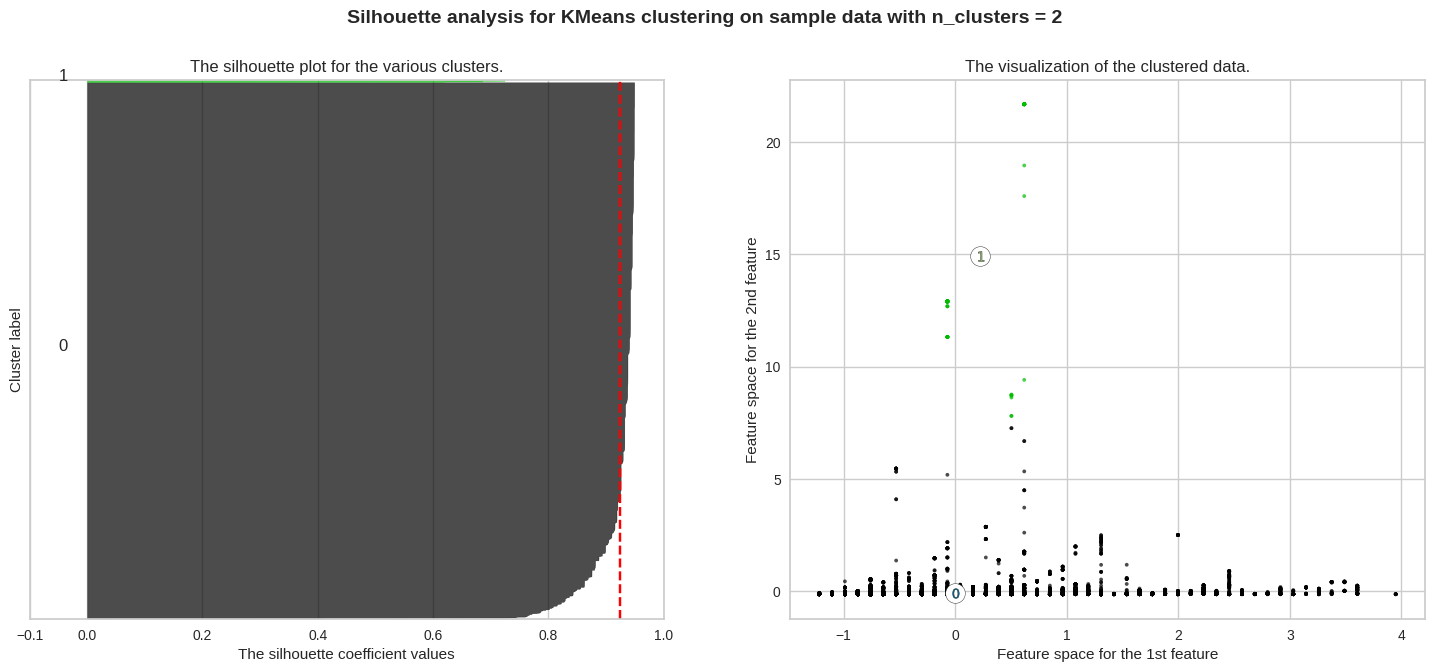

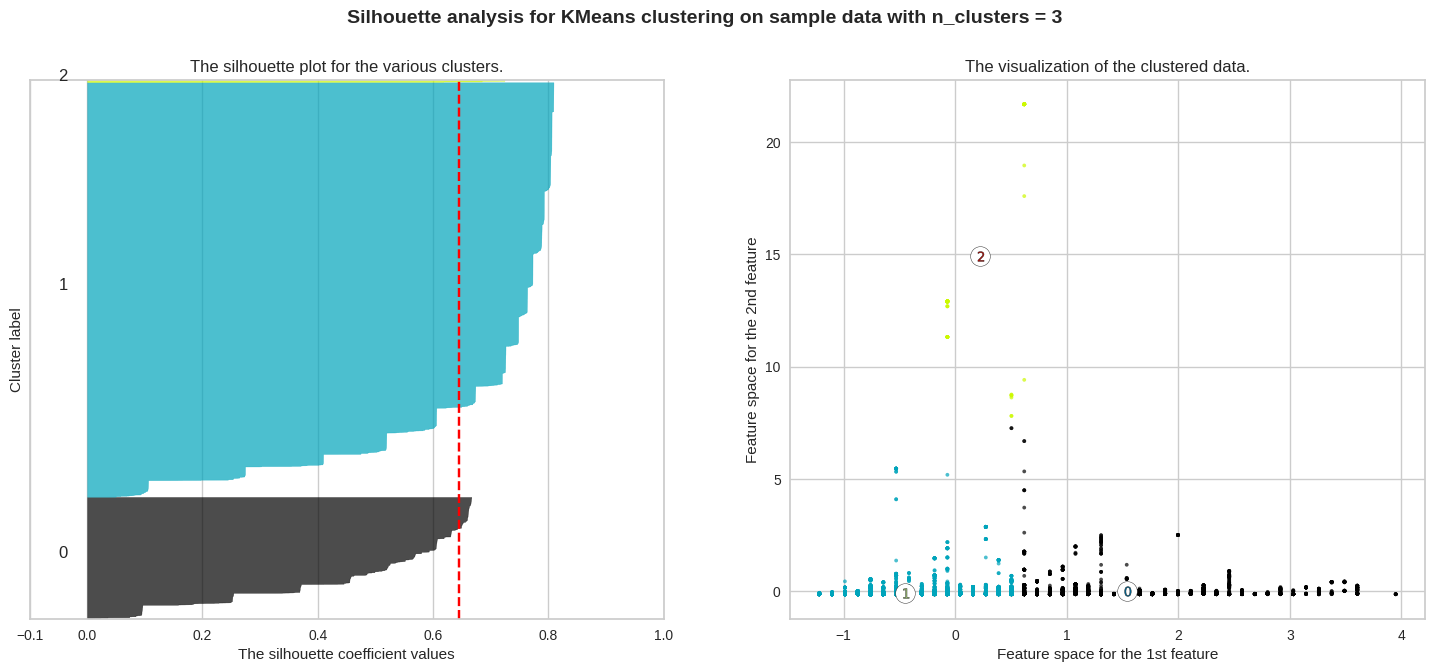

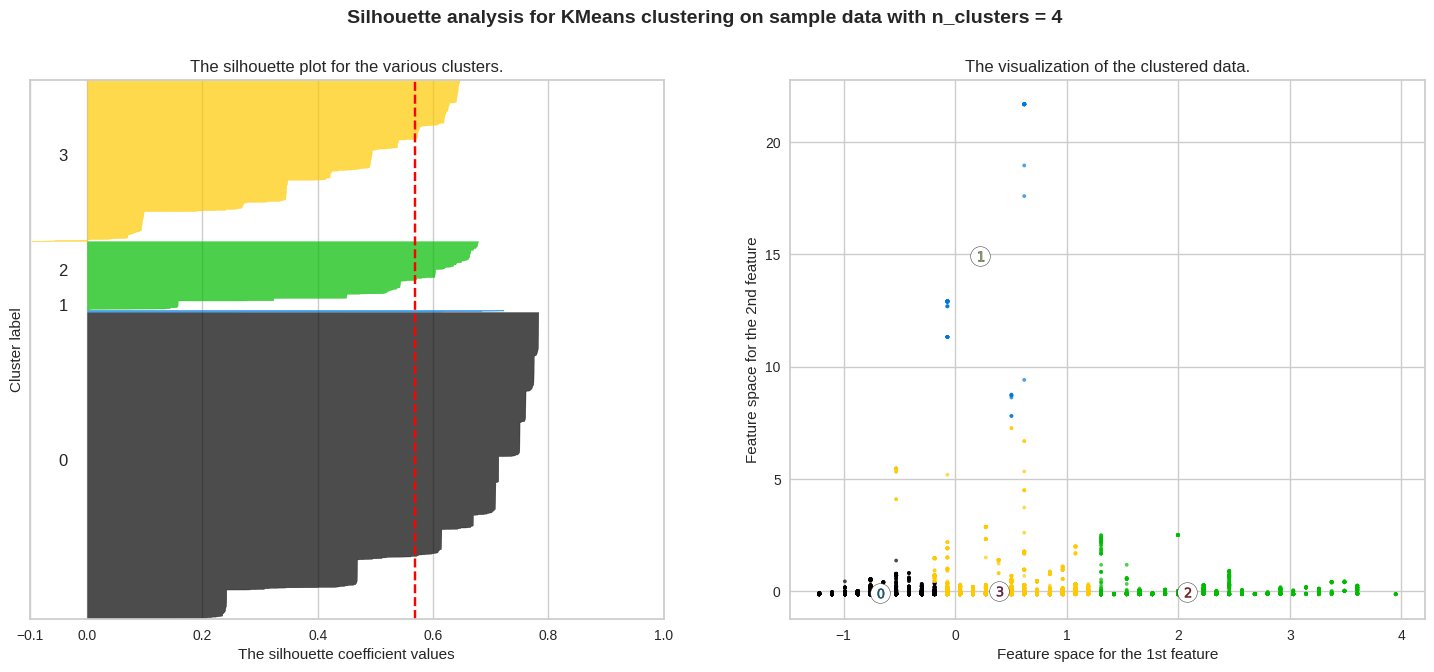

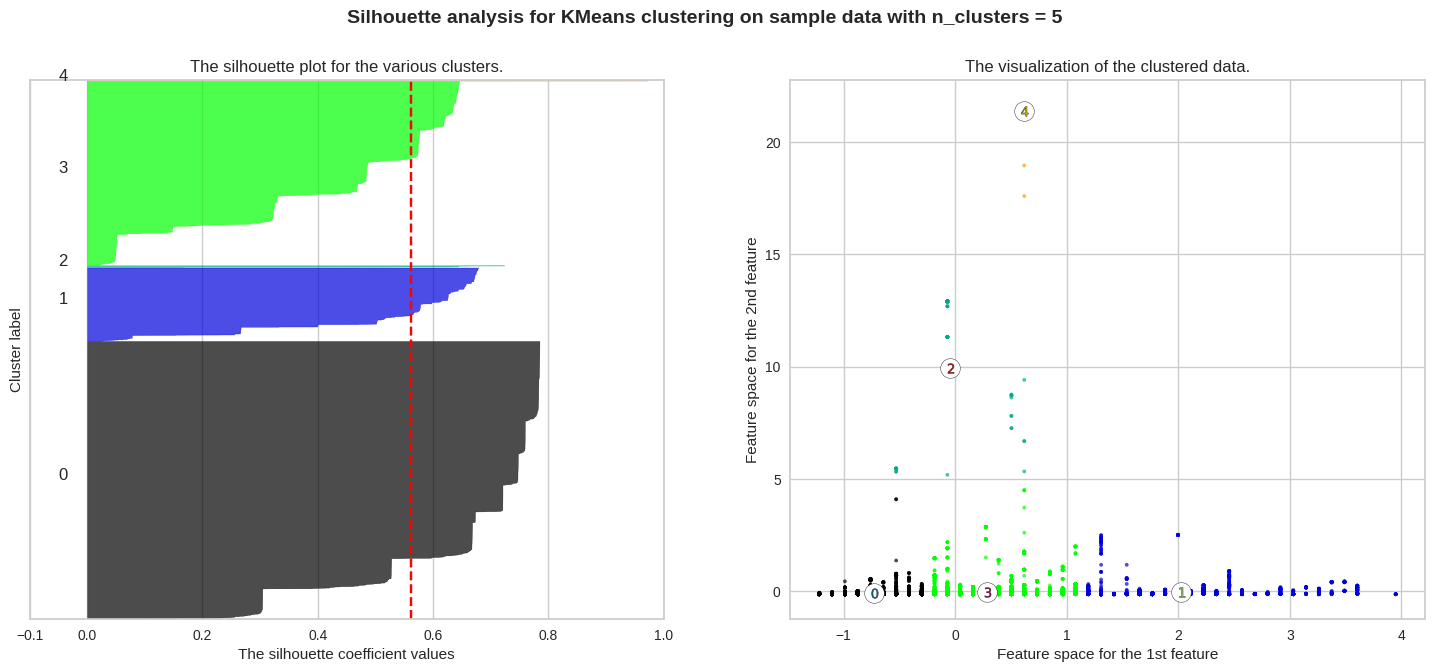

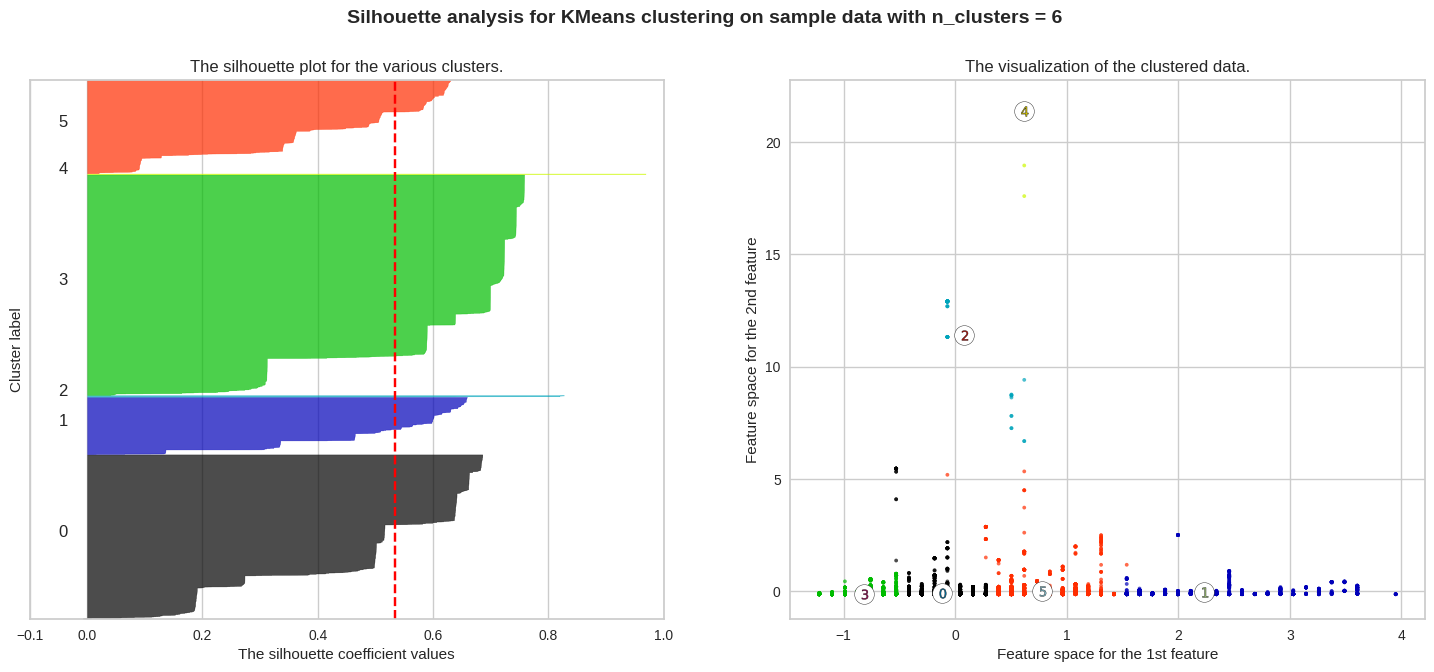

In [ ]:
silhoutte_analysis(ss_scale_df[['user_age', 'total_invested_amount']],list(range(2,7)))

##Segmentation

Using ss_scaler for cluster 4 and 5



> Cluster 4



In [ ]:
# Create cluster
Cluster_4 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=4)  
cluster_model.fit_predict(Cluster_4[['user_age', 'total_invested_amount']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_age,total_invested_amount,cluster
user_id,,,
3783302,3.375397,-0.102793,2
3783302,3.375397,-0.075529,2
3783302,3.375397,-0.075529,2
3783302,3.375397,-0.075529,2
3783302,3.375397,-0.075529,2


<Axes: xlabel='cluster', ylabel='user_age'>

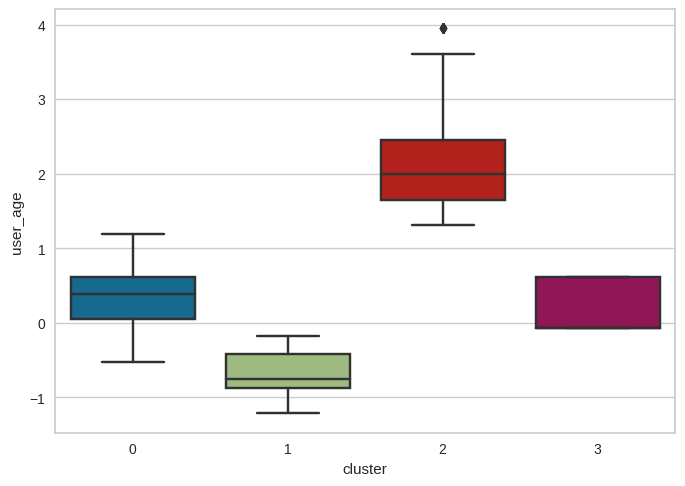

In [ ]:
# Number of users
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='user_age')

<Axes: xlabel='cluster', ylabel='total_invested_amount'>

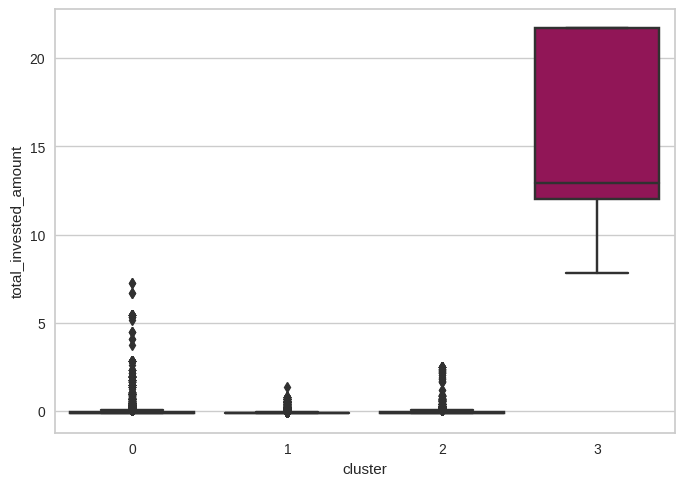

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='total_invested_amount')



> Cluster 5



In [ ]:
# Create cluster
Cluster_5 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=5)
cluster_model.fit_predict(Cluster_5[['user_age', 'total_invested_amount']])
Cluster_5['cluster'] = cluster_model.labels_
Cluster_5.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_age,total_invested_amount,cluster
user_id,,,
3783302,3.375397,-0.102793,4
3783302,3.375397,-0.075529,4
3783302,3.375397,-0.075529,4
3783302,3.375397,-0.075529,4
3783302,3.375397,-0.075529,4


<Axes: xlabel='cluster', ylabel='user_age'>

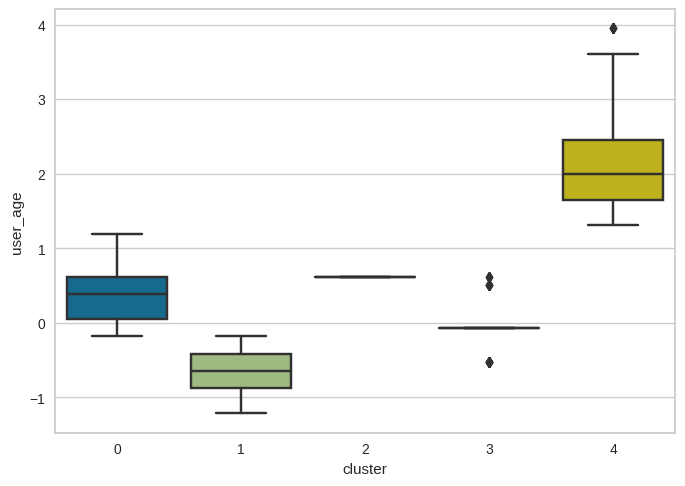

In [ ]:
# Number of users
sns.boxplot (data =Cluster_5 , x ='cluster' , y ='user_age')

<Axes: xlabel='cluster', ylabel='total_invested_amount'>

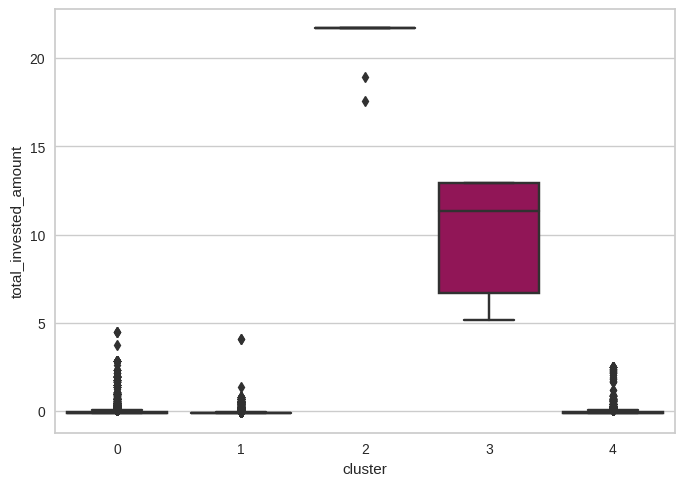

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_5 , x ='cluster' , y ='total_invested_amount')

**Insight:**


> According to the output of Elbow Method and Silhouette Analysis, the number of cluster that I choose is 4 clusters. Because having 4 clusters keeps the simplicity in interpreting or understanding the results of the clustering algorithm when the number of clusters is relatively small. Moreover, a small number of cluster makes the computation efficient.



##Merge the cluster output with the dataset

In [ ]:
df_segmented = Cluster_4.merge(merged_cluster,how= 'inner', on = 'user_id')
df_segmented

,user_id,user_age_x,total_invested_amount_x,cluster,registration_import_datetime,user_gender,user_age_y,user_occupation,user_income_range,referral_code_used,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount_y
0,3783302,3.375397,-0.102793,2,2021-09-14 8:16:54,Male,57,Swasta,Middle Income,Did not use referral,...,NaN,NaN,NaN,0,0,370000.0,100000.0,530000.0,NaN,1000000
1,3783302,3.375397,-0.102793,2,2021-09-14 8:16:54,Male,57,Swasta,Middle Income,Did not use referral,...,NaN,NaN,NaN,1000000,0,740000.0,200000.0,1060000.0,NaN,2000000
2,3783302,3.375397,-0.102793,2,2021-09-14 8:16:54,Male,57,Swasta,Middle Income,Did not use referral,...,NaN,NaN,NaN,0,0,740000.0,200000.0,1060000.0,NaN,2000000
3,3783302,3.375397,-0.102793,2,2021-09-14 8:16:54,Male,57,Swasta,Middle Income,Did not use referral,...,NaN,NaN,NaN,0,0,740000.0,200000.0,1060000.0,NaN,2000000
4,3783302,3.375397,-0.102793,2,2021-09-14 8:16:54,Male,57,Swasta,Middle Income,Did not use referral,...,NaN,NaN,NaN,0,0,740000.0,200000.0,1060000.0,NaN,2000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530996,3765807,2.456734,0.715130,2,2021-08-05 23:30:18,Male,49,Pengusaha,Higher Income,Did not use referral,...,NaN,NaN,NaN,0,0,20160000.0,2860000.0,6480000.0,NaN,29500000
530997,3765807,2.456734,0.715130,2,2021-08-05 23:30:18,Male,49,Pengusaha,Higher Income,Did not use referral,...,NaN,NaN,NaN,0,0,20160000.0,2860000.0,6480000.0,NaN,29500000
530998,3765807,2.456734,0.715130,2,2021-08-05 23:30:18,Male,49,Pengusaha,Higher Income,Did not use referral,...,NaN,NaN,NaN,1000000,0,20860000.0,2960000.0,6680000.0,NaN,30500000
530999,3765807,2.456734,0.715130,2,2021-08-05 23:30:18,Male,49,Pengusaha,Higher Income,Did not use referral,...,NaN,NaN,NaN,230000,0,20860000.0,3020000.0,6850000.0,NaN,30730000


##Cluster Visualization

Dividing each clusters by color and giving a name for each of which

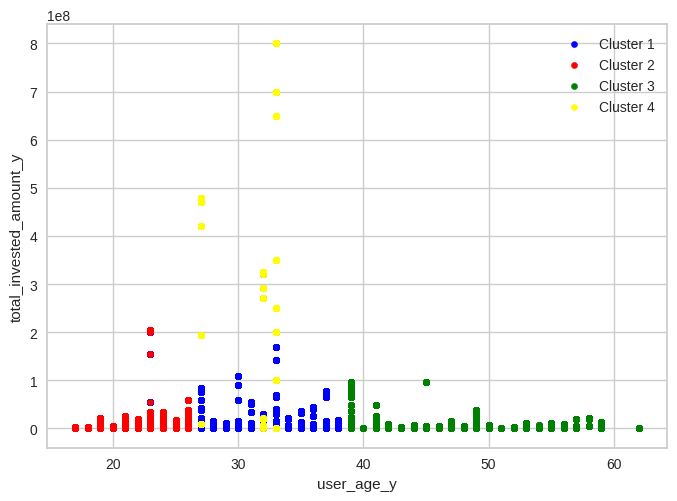

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='green', label='Cluster 3', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 3].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='yellow', label='Cluster 4', ax = cluster_scatter)

##Descrptive Statistics

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['user_age_y', 'total_invested_amount_y']].agg(['count','mean','min','max','median']).T


cluster                                    0             1             2  \
user_age_y              count   1.529030e+05  3.042680e+05  7.141500e+04   
                        mean    3.117179e+01  2.175294e+01  4.580657e+01   
                        min     2.300000e+01  1.700000e+01  3.900000e+01   
                        max     3.800000e+01  2.600000e+01  6.200000e+01   
                        median  3.100000e+01  2.200000e+01  4.500000e+01   
total_invested_amount_y count   1.529030e+05  3.042680e+05  7.141500e+04   
                        mean    6.722101e+06  1.304884e+06  4.407578e+06   
                        min     0.000000e+00  0.000000e+00  0.000000e+00   
                        max     8.000008e+08  2.050265e+08  9.665092e+07   
                        median  6.000000e+05  2.800000e+05  8.300000e+05   

cluster                                    3  
user_age_y              count   2.415000e+03  
                        mean    2.937433e+01  
                        min     2.700000e+01  
                        max     3.300000e+01  
                        median  2.700000e+01  
total_invested_amount_y count   2.415000e+03  
                        mean    4.502149e+08  
                        min     5.007510e+05  
                        max     8.000008e+08  
                        median  4.780760e+08

##Cluster Interpretation

To check what can be analyzed from the df_segmented

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,user_id,user_age_x,total_invested_amount_x,cluster,registration_import_datetime,user_gender,user_age_y,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount_y
0,3783302,3.375397,-0.102793,2,2021-09-14 8:16:54,Male,57,Swasta,Middle Income,Did not use referral,Gaji,110431,1000000,-1889569,2021-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,370000.0,100000.0,530000.0,NaN,1000000
1,3783302,3.375397,-0.102793,2,2021-09-14 8:16:54,Male,57,Swasta,Middle Income,Did not use referral,Gaji,110431,1000000,-1889569,2021-09-17,370000.0,NaN,100000.0,NaN,530000.0,NaN,NaN,NaN,1000000,0,740000.0,200000.0,1060000.0,NaN,2000000
2,3783302,3.375397,-0.102793,2,2021-09-14 8:16:54,Male,57,Swasta,Middle Income,Did not use referral,Gaji,110431,1000000,-1889569,2021-09-20,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,740000.0,200000.0,1060000.0,NaN,2000000
3,3783302,3.375397,-0.102793,2,2021-09-14 8:16:54,Male,57,Swasta,Middle Income,Did not use referral,Gaji,110431,1000000,-1889569,2021-09-21,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,740000.0,200000.0,1060000.0,NaN,2000000
4,3783302,3.375397,-0.102793,2,2021-09-14 8:16:54,Male,57,Swasta,Middle Income,Did not use referral,Gaji,110431,1000000,-1889569,2021-09-22,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,740000.0,200000.0,1060000.0,NaN,2000000


####User Age



In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['user_age_y'].mean()

,cluster,user_age_y
0,0,31.171789
1,1,21.752938
2,2,45.806567
3,3,29.374327


**Insight:**
* 0 = Average user age = 21 (Lowest)
* 1 = Average user age = 45 (Highest)
* 2 = Average user age = 29 
* 3 = Average user age = 30 

####User Occupation

In [ ]:
df_segmented.groupby(['cluster','user_occupation'], as_index = False)['user_id'].count()

,cluster,user_occupation,user_id
0,0,Guru,2855
1,0,IRT,7174
2,0,Others,11419
3,0,PNS,6506
4,0,Pelajar,32705
5,0,Pengusaha,8623
6,0,Swasta,82892
7,0,TNI/Polisi,729
8,1,Guru,1369
9,1,IRT,2966


**Insight:**
* 0 = Dominated by Pelajar
* 1 = Dominated by Swasta
* 2 = Dominated by Swasta
* 3 = Dominated by Swasta

####User Gender

In [ ]:
df_segmented.groupby(['cluster','user_gender'], as_index = False)['user_id'].count()

,cluster,user_gender,user_id
0,0,Female,53856
1,0,Male,99047
2,1,Female,109102
3,1,Male,195166
4,2,Female,19303
5,2,Male,52112
6,3,Female,1443
7,3,Male,972


**Insight:**
* 0 = 65% Male, 35% Female
* 1 = 71% Male, 29% Female
* 2 = 60% Female, 40% Male
* 3 = 64% Male, 36% Female

####User Income Range

In [ ]:
df_segmented.groupby(['cluster','user_income_range'], as_index = False)['user_id'].count()

,cluster,user_income_range,user_id
0,0,Higher Income,3464
1,0,Lower Income,71720
2,0,Middle Income,77719
3,1,Lower Income,272004
4,1,Middle Income,32264
5,2,Higher Income,3908
6,2,Lower Income,26781
7,2,Middle Income,40726
8,3,Lower Income,874
9,3,Middle Income,1541


**Insight:**
* 0 = Lower Income, Middle Income
* 1 = Lower Income, Middle Income, Higher Income
* 2 = Lower Income, Middle Income
* 3 = Lower Income, Middle Income, Higher Income

####Total Invested Amount

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['total_invested_amount_y'].mean()

,cluster,total_invested_amount_y
0,0,6.722101e+06
1,1,1.304884e+06
2,2,4.407578e+06
3,3,4.502149e+08


**Insight:**
* 0 = Average total invested amount = 1.280.423 (Lowest)
* 1 = Average total invested amount = 4.396.517 
* 2 = Average total invested amount = 450.214.887 (Highest)
* 3 = Average total invested amount = 5.950.922

####Saham Invested Amount

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['saham_invested_amount'].mean()

,cluster,saham_invested_amount
0,0,9.962402e+05
1,1,2.973305e+05
2,2,1.279970e+06
3,3,7.312665e+06


**Insight:**
* 0 = Average total Saham invested amount = 290.349 (Lowest)
* 1 = Average total Saham invested amount = 1.217.937
* 2 = Average total Saham invested amount = 7.312.665 (Highest)
* 3 = Average total Saham invested amount = 911.075 

####Pasar Uang Invested Amount

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['pasar_uang_invested_amount'].mean()

,cluster,pasar_uang_invested_amount
0,0,1.139532e+06
1,1,3.996728e+05
2,2,1.885384e+06
3,3,2.055145e+08


**Insight:**
* 0 = Average total Pasar Uang invested amount = 372.393 (Lowest)
* 1 = Average total Pasar Uang invested amount = 1.877.809
* 2 = Average total Pasar Uang invested amount = 205.514.459 (Highest)
* 3 = Average total Pasar Uang invested amount = 1.046.597 

####Pendapatan Tetap Invested Amount

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['pendapatan_tetap_invested_amount'].mean()

,cluster,pendapatan_tetap_invested_amount
0,0,5.102084e+06
1,1,6.437370e+05
2,2,1.684155e+06
3,3,3.184167e+08


**Insight:**
* 0 = Average total Pendapatan Tetap invested amount = 637.662 (Lowest)
* 1 = Average total Pendapatan Tetapinvested amount =  1.654.082
* 2 = Average total Pendapatan Tetap invested amount = 318.416.697 (Highest)
* 3 = Average total Pendapatan Tetap invested amount = 4.570.760 

####Campuran Invested Amount

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['campuran_invested_amount'].mean()

,cluster,campuran_invested_amount
0,0,2.387287e+06
1,1,3.369833e+06
2,2,1.293351e+06
3,3,1.000000e+07


**Insight:**
* 0 = Average total Campuran invested amount = 3.869.477 
* 1 = Average total Campuran invested amount =  1.926.486 
* 2 = Average total Campuran invested amount = 10.000.000 (Highest)
* 3 = Average total Campuran invested amount = 1.896.585 (Lowest)

## Cluster Interpretation and Recommendations

The deck below provides outlines the entire project journey, from data cleaning to cluster interpretation and recommendations. It offers an in-depth overview of the project's various stages and the methodologies employed, such as exploratory data analysis, clustering algorithms, and visualizations.

It highlights the recommendations that were made based on the findings, allowing stakeholders to make informed decisions and take appropriate actions. The comprehensive and insightful nature of the deck makes it a valuable resource for anyone seeking to understand the project's scope and outcomes.

**Link to the deck:** https://docs.google.com/presentation/d/1qqWPIpT7HJXIOcUazMr_4M4ni43YVYj7W-NQCEM6-GU/edit?usp=sharing